In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
%matplotlib inline

In [2]:
data=pd.read_csv('BTC_Data_736_features_raw.csv',sep=',')

In [3]:
data.interpolate(axis=0,inplace=True)

In [4]:
interval3=(data['Date'] >= '2013/04/01') & (data['Date'] <= '2019/12/31')

In [5]:
df=data.loc[interval3]

In [6]:
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
989,2013/04/01,94.715,52572,139256.0,48809,6695826.0,6.550211e+13,7220.0,136779480.0,0.0777,...,99.456,96.992,95.075,93.774,91.450,9.383,36.980,104.747,185.993,606.456
990,2013/04/02,107.749,63095,175443.0,62276,6695826.0,6.184560e+13,7990.0,278422775.0,0.1050,...,99.811,98.201,96.416,94.987,92.645,23.206,50.270,109.704,231.964,716.218
991,2013/04/03,120.003,63766,184209.0,69174,6695826.0,6.027037e+13,8852.0,284039909.0,0.1330,...,99.902,98.752,97.190,95.785,93.508,34.759,51.448,107.789,259.795,808.284
992,2013/04/04,123.562,66738,221568.0,71753,6695826.0,5.527246e+13,8777.0,282809750.0,0.1410,...,99.919,98.869,97.368,95.977,93.724,30.456,44.093,93.098,237.355,834.762
993,2013/04/05,128.664,61215,190067.0,69310,7005058.0,5.181545e+13,9950.0,264855827.0,0.1200,...,99.941,99.022,97.602,96.233,94.013,19.411,48.589,95.718,229.992,876.762


In [7]:
X=df.iloc[:,2:]

In [8]:
X.head()

,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
989,52572,139256.0,48809,6695826.0,6.550211e+13,7220.0,136779480.0,0.0777,0.0474,7.273,...,99.456,96.992,95.075,93.774,91.450,9.383,36.980,104.747,185.993,606.456
990,63095,175443.0,62276,6695826.0,6.184560e+13,7990.0,278422775.0,0.1050,0.0539,7.956,...,99.811,98.201,96.416,94.987,92.645,23.206,50.270,109.704,231.964,716.218
991,63766,184209.0,69174,6695826.0,6.027037e+13,8852.0,284039909.0,0.1330,0.0600,8.229,...,99.902,98.752,97.190,95.785,93.508,34.759,51.448,107.789,259.795,808.284
992,66738,221568.0,71753,6695826.0,5.527246e+13,8777.0,282809750.0,0.1410,0.0618,9.351,...,99.919,98.869,97.368,95.977,93.724,30.456,44.093,93.098,237.355,834.762
993,61215,190067.0,69310,7005058.0,5.181545e+13,9950.0,264855827.0,0.1200,0.0643,9.114,...,99.941,99.022,97.602,96.233,94.013,19.411,48.589,95.718,229.992,876.762


In [9]:
estimators=[]

In [10]:
estimators.append(['minmax',MinMaxScaler(feature_range=(-1,1))])

In [11]:
scale=Pipeline(estimators)

In [12]:
X=scale.fit_transform(X)

In [13]:
pca = PCA(n_components=6,random_state=7)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=7,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.explained_variance_ratio_

array([0.43738885, 0.12402112, 0.09038058, 0.04406626, 0.03002204,
       0.02513081])

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.43738885, 0.56140997, 0.65179055, 0.69585681, 0.72587885,
       0.75100966])

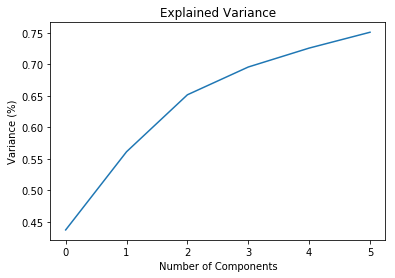

In [16]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [17]:
df_pca=pd.DataFrame(pca.components_).transpose()

In [18]:
df_pca.columns=['comp_1','comp_2','comp_3','comp_4','comp_5','comp_6']

In [19]:
y=df.iloc[:,1:2]

In [20]:
y.reset_index(drop=True,inplace=True)

In [21]:
df_pca['priceUSD']=y

In [22]:
df_pca.head()

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,priceUSD
0,0.074162,0.015329,-0.048046,0.042709,0.007321,-0.014252,94.715
1,0.094841,0.072671,-0.077840,-0.014523,0.027039,-0.053013,107.749
2,0.064880,0.028643,-0.038454,0.019065,0.028725,-0.014173,120.003
3,0.066701,-0.118325,0.009314,0.034983,-0.002191,0.012280,123.562
4,0.060540,-0.105832,0.011500,0.031725,-0.005375,0.006382,128.664


In [23]:
df_pca.to_csv('pca_75_reg.csv',index=False)

# Classification

In [13]:
one=data['priceUSD'].shift(-1,fill_value=1)

In [14]:
df['one']=one.loc[interval3]

/home/mudassir/btcpaper/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df['difference']=((df['one']-df['priceUSD'])/df['priceUSD'])*100

/home/mudassir/btcpaper/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df.reset_index(drop=True,inplace=True)

In [17]:
category=[]
for x in range(len(df['difference'])):
    if df['difference'][x]>=0:
        category.append(1)
    else:
        category.append(0)

In [18]:
sum(category)

1332

In [19]:
df['category']=pd.DataFrame(category)

/home/mudassir/btcpaper/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df.tail()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,one,difference,category
2461,2019/12/27,7263.0,322059,709273.0,415723,1.294859e+13,9.725392e+19,0.137,6.292988e+09,0.386,...,42.961,46.220,-1.348,0.717,0.076,-0.081,-11.109,7361.0,1.349305,1
2462,2019/12/28,7361.0,298138,625161.0,376120,1.294859e+13,9.517417e+19,0.145,5.033568e+09,0.341,...,44.575,46.608,1.080,2.124,2.180,-2.562,-9.029,7469.0,1.467192,1
2463,2019/12/29,7469.0,279770,552879.0,344377,1.294859e+13,1.010148e+20,0.144,4.185532e+09,0.337,...,46.295,47.031,2.631,2.658,4.788,-1.656,-7.569,7388.0,-1.084483,0
2464,2019/12/30,7388.0,324331,661326.0,418908,1.294859e+13,1.018722e+20,0.152,7.289436e+09,0.362,...,45.205,46.750,1.722,-1.875,4.286,-3.716,-11.675,7293.0,-1.285869,0
2465,2019/12/31,7293.0,293302,687065.0,375764,1.294859e+13,9.877266e+19,0.135,5.272493e+09,0.369,...,43.938,46.417,-0.935,-0.948,6.402,-0.922,-11.770,7238.0,-0.754148,0


In [21]:
df['priceUSD']=df['category']

/home/mudassir/btcpaper/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
df.drop(columns=['category','one','difference'],inplace=True)

/home/mudassir/btcpaper/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
df.head(3)

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2013/04/01,1,52572,139256.0,48809,6695826.0,6.550211e+13,7220.0,136779480.0,0.0777,...,99.456,96.992,95.075,93.774,91.450,9.383,36.980,104.747,185.993,606.456
1,2013/04/02,1,63095,175443.0,62276,6695826.0,6.184560e+13,7990.0,278422775.0,0.1050,...,99.811,98.201,96.416,94.987,92.645,23.206,50.270,109.704,231.964,716.218
2,2013/04/03,1,63766,184209.0,69174,6695826.0,6.027037e+13,8852.0,284039909.0,0.1330,...,99.902,98.752,97.190,95.785,93.508,34.759,51.448,107.789,259.795,808.284


In [24]:
X=df.iloc[:,2:]

In [25]:
X.head()

,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,52572,139256.0,48809,6695826.0,6.550211e+13,7220.0,136779480.0,0.0777,0.0474,7.273,...,99.456,96.992,95.075,93.774,91.450,9.383,36.980,104.747,185.993,606.456
1,63095,175443.0,62276,6695826.0,6.184560e+13,7990.0,278422775.0,0.1050,0.0539,7.956,...,99.811,98.201,96.416,94.987,92.645,23.206,50.270,109.704,231.964,716.218
2,63766,184209.0,69174,6695826.0,6.027037e+13,8852.0,284039909.0,0.1330,0.0600,8.229,...,99.902,98.752,97.190,95.785,93.508,34.759,51.448,107.789,259.795,808.284
3,66738,221568.0,71753,6695826.0,5.527246e+13,8777.0,282809750.0,0.1410,0.0618,9.351,...,99.919,98.869,97.368,95.977,93.724,30.456,44.093,93.098,237.355,834.762
4,61215,190067.0,69310,7005058.0,5.181545e+13,9950.0,264855827.0,0.1200,0.0643,9.114,...,99.941,99.022,97.602,96.233,94.013,19.411,48.589,95.718,229.992,876.762


In [26]:
estimators=[]

In [27]:
estimators.append(['minmax',MinMaxScaler(feature_range=(-1,1))])

In [28]:
scale=Pipeline(estimators)

In [29]:
X=scale.fit_transform(X)

In [41]:
pca = PCA(n_components=50,random_state=7)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=7,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
pca.explained_variance_ratio_

array([0.43738885, 0.12402112, 0.09038058, 0.04406626, 0.03002204,
       0.02513081, 0.01856041, 0.01586082, 0.01563144, 0.0134129 ,
       0.01191998, 0.01079576, 0.01024017, 0.00906592, 0.00748592,
       0.00725145, 0.00641153, 0.0063237 , 0.00550938, 0.00508766,
       0.00446051, 0.00406503, 0.00395771, 0.00367028, 0.00338003,
       0.00318193, 0.00302956, 0.0029422 , 0.00275338, 0.00268701,
       0.00262686, 0.00230424, 0.00222074, 0.00202925, 0.00190189,
       0.00186127, 0.00175622, 0.00168084, 0.00161845, 0.00157558,
       0.00147986, 0.00144313, 0.00139659, 0.0013125 , 0.00129639,
       0.00120848, 0.00110883, 0.00103141, 0.00100158, 0.00096521])

In [43]:
np.cumsum(pca.explained_variance_ratio_)

array([0.43738885, 0.56140997, 0.65179055, 0.69585681, 0.72587885,
       0.75100966, 0.76957007, 0.78543089, 0.80106233, 0.81447522,
       0.8263952 , 0.83719096, 0.84743113, 0.85649705, 0.86398297,
       0.87123441, 0.87764595, 0.88396965, 0.88947903, 0.8945667 ,
       0.89902721, 0.90309224, 0.90704995, 0.91072023, 0.91410026,
       0.91728219, 0.92031175, 0.92325395, 0.92600733, 0.92869434,
       0.9313212 , 0.93362545, 0.93584619, 0.93787544, 0.93977733,
       0.9416386 , 0.94339482, 0.94507566, 0.94669411, 0.94826969,
       0.94974956, 0.95119269, 0.95258928, 0.95390177, 0.95519816,
       0.95640664, 0.95751547, 0.95854687, 0.95954846, 0.96051367])

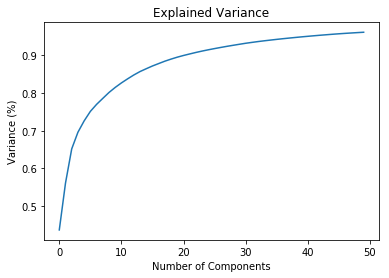

In [44]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [45]:
df_pca=pd.DataFrame(pca.components_).transpose()

In [46]:
y=df.iloc[:,1:2]

In [47]:
y.reset_index(drop=True,inplace=True)

In [48]:
df_pca['priceUSD']=y

In [49]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,priceUSD
0,0.074162,0.015329,-0.048046,0.042709,0.007321,-0.014251,0.001355,-0.044263,-0.014403,-0.036199,...,0.017701,-0.020600,-0.021125,-0.001148,-0.004502,-0.012360,-0.032049,0.007081,0.006557,1
1,0.094841,0.072671,-0.077840,-0.014523,0.027039,-0.053013,0.056817,-0.009060,0.047423,-0.009912,...,-0.047544,0.013065,0.065670,0.006482,0.020321,0.007130,0.016320,0.013705,-0.042491,1
2,0.064880,0.028643,-0.038454,0.019065,0.028725,-0.014173,-0.002313,-0.031474,-0.009467,-0.034115,...,0.020285,0.006481,-0.012896,0.008115,-0.022120,-0.021993,0.012241,0.021045,-0.033730,1
3,0.066701,-0.118325,0.009314,0.034983,-0.002191,0.012280,-0.002472,0.004447,0.012511,-0.012443,...,-0.000787,0.002537,0.005720,0.002473,-0.002302,-0.018649,-0.002314,0.012274,-0.009088,1
4,0.060540,-0.105832,0.011500,0.031725,-0.005375,0.006381,-0.006996,-0.001401,-0.002304,-0.018730,...,0.017911,-0.013560,0.010858,-0.022299,-0.007560,0.010064,-0.016911,-0.002309,0.002561,1


In [50]:
df_pca.to_csv('pca_75_clas.csv',index=False)